{/* cspell:ignore checkmark ccnot */}

# Get started with Qiskit in the classroom

For this Qiskit in Classrooms module, students must have a working Python environment with the following packages installed:
- `qiskit` v2.1.0 or newer
- `qiskit-ibm-runtime` v0.40.1 or newer
- `qiskit-aer` v0.17.0 or newer
- `qiskit.visualization`
- `numpy`
- `pylatexenc`

To set up and install the packages above, see the [Install Qiskit](/docs/guides/install-qiskit) guide.
In order to run jobs on real quantum computers, students will need to set up an account with IBM Quantum&reg; by following the steps in the [Set up your IBM Cloud&reg; account](/docs/guides/cloud-setup) guide.

This module was tested and used 2 seconds of QPU time on a Heron v2 processor. This is an estimate only. Your actual usage may vary.

In [13]:
# Uncomment and modify this line as needed to install dependencies
#!pip install 'qiskit>=2.1.0' 'qiskit-ibm-runtime>=0.40.1' 'qiskit-aer>=0.17.0' 'numpy' 'pylatexenc'

## Introduction

In the Qiskit in the Classroom modules, you'll have the opportunity to use a quantum computer to explore various concepts in quantum computing-adjacent fields such as quantum mechanics, computer science, chemistry, and more. This module serves as a prerequisite to the others - it introduces the fundamentals of quantum computing and how to use Qiskit to run quantum circuits.

First we'll give you a brief overview of how a classical computer works, then we'll show you how these concepts are adapted to fit the quantum computing paradigm. Finally, we'll show you how to put these concepts together to build and execute your first quantum circuit.

## Classical computers

You're likely familiar with the basics of how classical computers work, but here we'll highlight a few of the key features so that we can then draw a comparison to quantum computers.

### The basic units of information: bits

Classical computers process classical information, and the fundamental unit of classical information is the *bit*. A single bit can store the answer to one "yes/no" question. We usually represent the two binary states of a bit as "0" and "1".

#### Review of binary numbers

Combining bits enables you to store more information. For example, if you want to store a number from 0 to 15, you could do so with four bits in the following way:

|  | |  | |
| :------- | :------: | :-------: | -------: |
| 0 = 0000     |4 = 0100  | 8 = 1000    | 12 = 1100 |
| 1 = 0001  | 5 = 0101  | 9 = 1001  | 13 = 1101 |
| 2 = 0010  | 6 = 0110  | 10 = 1010   | 14 = 1110 |
| 3 = 0011  | 7 = 0111   | 11 = 1011  | 15 = 1111|

In general, to convert from a binary number of $N$ bits to a familiar, base-10 number, you multiply the least-significant (rightmost) bit by $2^0 = 1$, the next bit to the left by $2^1 = 2$, then the next by $2^2 = 4$, and so on, until you reach the most significant (leftmost bit), which you multiply $2^{N-1}$.

So, that means that $N$ bits can be in one of $2^N$ different possible states.


#### Check your understanding
Read the question(s) below, think about your answer, then click the triangle to reveal the solution.
<details>
<summary>

How many bits would you need to represent the number 86? Write out the bitstring that encodes this number in binary.

</summary>

__Answer:__

Remember, $N$ bits allows you to represent the numbers $0$ through $2^N - 1$, so using six bits would get us up to $2^6 - 1 = 63$. That's not quite enough. We add one more bit to get up to $2^7 - 1 = 127$. Now let's break 86 down into powers of 2:

$$
\begin{aligned}
86 &= 64 + 16 + 4 + 2 \\
&= 2^6 \times 1 + 2^5 \times 0 + 2^4 \times 1 + 2^3 \times 0 + 2^2 \times 1 + 2^1 \times 1 + 2^0 \times 0 \\
&= 1010110
\end{aligned}
$$
</details>


### Fundamental operations: gates

Now, a computer needs to be able to *do* something with the bits in order to, well, compute. Binary gates are the operations that form the fundamental building blocks of all the more complicated algorithms and codes.

### Single-bit gate:

#### NOT

When you have only one bit, there's only one way you can transform its state: flip the state from 0 to 1 or from 1 to 0. We call this the "NOT" gate. The effect of this gate — and the rest of the gates we'll discuss below — can be represented in a so-called "truth table," with columns for the input and output states of the qubits. The truth table for the NOT gate is:

| Input | Output |
| :------- | -------: |
| 0      |1  |
| 1  | 0  |

### Multi-bit gates:

#### AND

AND is a two-bit gate that takes two input bits and outputs a single bit. It outputs 1 if both input bits are 1, and 0 otherwise:

| Input | Output |
| :------- | -------: |
| 00      |0  |
| 01  | 0  |
| 10      |0  |
| 11  | 1  |

#### OR

OR is another two-bit gate with a single output bit. It outputs 1 if *either* of the bits are 1:

| Input | Output |
| :------- | -------: |
| 00      |0  |
| 01  | 1  |
| 10      |1  |
| 11  | 1  |

#### XOR

XOR stands for "exclusive OR" and it is like the OR gate, but outputs 1 if *only one* of the input bits are 1. It outputs 0 if they are either both 1 or both 0:

| Input | Output |
| :------- | -------: |
| 00      | 0  |
| 01  | 1  |
| 10      | 1  |
| 11  | 0  |


### Measurements:

Typically, when learning about classical computing, not much attention is paid to the process of reading out the state of the bits. This is because it's not very complex from a conceptual perspective. You can measure the bits at anytime before, during, or after a computation, and it doesn't affect the outcome. This is not the case in quantum computing, as we will discuss below.

### Circuits:

By combining the gates above, you can do any sort of operation you want on a computer. Let's take a simple example: Using the AND and XOR gates, you can construct the half-adder circuit, which calculates the sum of two bits. This is represented in a logical circuit diagram, where the wires represent the bits and the gates operating on the bits are shown as symbols on the corresponding wires:

![Classical circuit diagram for the half-adder circuit. An XOR gate generates the Sum output bit and an AND gate generates the Carry output bit.](/learning/images/modules/quantum-mechanics/get-started-with-qiskit/classicaladder.avif)

So, the two bits are copied and fed through both an AND gate and an XOR gate. The result of the XOR gate is the "sum bit" (S), which remains in the ones place of the binary number, and the result of the AND gate is the "carry bit" (C), which is the value of the next most significant digit in the binary number. Here is the truth table:

| $A$ | $B$ | Sum ($A \oplus B$) | Carry ($A \wedge B$) |
|---|---|-------------|----------------|
| 0 | 0 |      0      |       0        |
| 0 | 1 |      1      |       0        |
| 1 | 0 |      1      |       0        |
| 1 | 1 |      0      |       1        |


#### Check your understanding
Read the question(s) below, think about your answer, then click the triangle to reveal the solution.
<details>
<summary>

Verify that the above truth table yields the correct solution for an adder circuit. That is, for each of the four options of A and B, verify that $A+B=S+2 \times C$.

</summary>

__Answer:__

$$
\begin{aligned}
0+0 &= 0+0 = 0 ~\checkmark \\
0+1 &= 1+0 = 1  ~\checkmark \\
1+0 &= 1+0 = 1  ~\checkmark \\
1+1 &= 0+2 = 2 ~\checkmark \\
\end{aligned}
$$

</details>

## Quantum computers

### Bits $\rightarrow$ qubits

Just as bits are the fundamental units of classical information, *quantum* bits, or "qubits," are the fundamental units of quantum information. Like the classical bit, the state of a qubit can be either 0 or 1, which we typically denote as $\vert 0\rangle$ and $\vert 1\rangle$. But unlike the classical bit, a quantum bit can also be in a *superposition* of both the $\vert 0\rangle$ state and the $\vert 1\rangle$ state at the same time. In general, a qubit can be in any state $\vert \psi\rangle$ of the form:

$$
\vert \psi\rangle = c_0 \vert 0\rangle + c_1 \vert 1\rangle
$$

where $c_0$ and $c_1$ are complex amplitudes with $\vert c_0 \vert ^2+\vert c_1\vert ^2=1$.

#### The quantum phase

Because $c_0$ and $c_1$ are complex, they can each be written as $c_i = \vert c_i\vert e^{i\phi_i}$ where $\phi_i$ is called the *phase*. If we multiply the whole state by the same overall phase factor, nothing physically changes — this is called a global phase, and it has no observable consequences.

For that reason, it is conventional to “factor out” $e^{i\phi_0}$, giving:

$$\vert \psi\rangle = \vert c_0\vert \vert 0\rangle + \vert c_1\vert e^{i\phi}\vert 1\rangle$$

where $\phi = \phi_1-\phi_0$ is the *relative* phase of the quantum state, which *does* have observable consequences.

This phase plays a very important role in quantum computing, and you will explore its various consequences in the subsequent Qiskit in the Classroom modules.

#### Multiple qubits

While the state of multiple bits could simply be expressed as a string of 0s and 1s, the state of multiple qubits gets a little more complicated because of the principles of *superposition* and *entanglement*.

Recall that $N$ bits could be in one of $2^N$ possible states ranging from binary numbers 000...000 to 111...111. But now, because of the principle of superposition, $N$ *qubits* can be in a superposition of *all* of these states at once!


This can be expressed as

$$
\psi_N = \sum_{i=0}^{2^N-1} c_i \vert i\rangle
$$

where, as in the classical case, the state $\vert i\rangle$ corresponds to the state where each qubit is in the right combination of 0s and 1s to yield the binary number $i$. These are known as the "computational basis states" of the quantum system. For example, a three-qubit state can be written as a superposition of its eight computational basis states:


$$
\psi_3 = c_0 \vert 000\rangle + c_1 \vert 001\rangle + c_2 \vert 010\rangle + c_3 \vert 011\rangle + c_4 \vert 100\rangle + c_5 \vert 101\rangle + c_6 \vert 110\rangle + c_7 \vert 111\rangle
$$

Each qubit in the system is denoted with an index $0$ through $N-1$. The convention is to read the qubit states from right to left, so that the state of qubit $0$ is the rightmost state and the state of qubit $N-1$ is the leftmost. This is known as "little-endian" notation, and it may seem counterintuitive at first, since we're used to reading left to right.


#### Check your understanding
Read the question(s) below, think about your answer, then click the triangle to reveal the solution.
<details>
<summary>

At first glance, it may seem counterintuitive to order the qubits from right to left as in little-endian notation, but it's actually a very logical thing to do! Explain why. (Recall our discussion above of binary to base-10 number conversion.)

</summary>

__Answer:__

If we order qubits from right to left, so that qubit 0 is the farthest right and qubit N-1 is the farthest left, It is logical to associate qubit $0$ with the least-significant bit, which is multiplied by $2^0$ and qubit $N-1$ with the most-significant bit, which is multiplied by $2^{N-1}$.


</details>



#### Entanglement

As we mentioned earlier, another key feature of qubits is that they can be *entangled* with one another. Let's take an example of a two-qubit state, where $c_0 = c_3 = \frac{1}{\sqrt{2}}$ and $c_1 = c_2 = 0$:

$$\vert \psi\rangle = \frac{1}{\sqrt{2}}(\vert 00\rangle + \vert 11\rangle)$$

So, the state of qubit 0 can be either $\vert 0\rangle$ or $\vert 1\rangle$ with equal probability, and same with the state of qubit 1. But these probabilities are no longer independent of one another. If we find the state of qubit 0 to be $\vert 0\rangle$, then we *know* that qubit 1 will also be in $\vert 0\rangle$. This is true no matter how far apart one another, which is why the act of measuring an entangled state is sometimes referred to as "spooky action at a distance."

Entanglement can also take other forms. For example, the state

$$\vert \psi\rangle = \frac{1}{\sqrt{2}}(\vert 01\rangle + \vert 10\rangle)$$

produces opposite outcomes every time: if one qubit is measured $\vert 0\rangle$, the other is guaranteed to be found in the $\vert 1\rangle$ state.


#### Check your understanding
Read the question(s) below, think about your answer, then click the triangle to reveal the solution.
<details>
<summary>

Is the state $\vert \psi\rangle = \vert 11\rangle$ entangled? Why or why not?

</summary>

__Answer:__

It is not entangled. While the outcomes are always the same when you measure both qubits, this is only because each qubit is always fixed in the state $\vert 1\rangle$. The result of measuring one qubit does not actually depend on the other — both are just always $\vert 1\rangle$.

In general, if you can describe each qubit’s state separately and then multiply them together like this:

$$\vert \psi\rangle = \vert \psi_1\rangle \vert \psi_0\rangle $$

Then it is known as a "product state" and is *not* entangled.

</details>



#### Vector notation

It is often helpful to use vectors and matrices to see how the quantum state transforms under different operations. In this representation, our quantum states will be vectors, and our quantum gates (discussed in the next section) will be matrices that transform the vectors.

For a single qubit, the vector form of the states are chosen to be:
$$\vert 0\rangle = \begin{pmatrix}1 \\ 0\end{pmatrix}$$
$$\vert 1\rangle = \begin{pmatrix}0 \\ 1\end{pmatrix}$$
In this way, an arbitrary state $\vert \psi\rangle = a\vert 0\rangle+b\vert 1\rangle$ can be written as
$$\vert \psi\rangle =\begin{pmatrix}a \\ b\end{pmatrix}$$

For a general, $n$-qubit state, we will need a $2^n$-dimensional vector, with basis states ordered as you might expect, in ascending binary value:

$$
\vert 0 \dots 000\rangle = \begin{pmatrix}1 \\ 0 \\ 0 \\ \vdots \\ 0\end{pmatrix}, \vert 0 \dots 001 \rangle = \vert 1 \dots 110\rangle = \begin{pmatrix}0 \\ \vdots \\ 0 \\ 1 \\ 0\end{pmatrix}, \vert 1 \dots 111 \rangle = \begin{pmatrix}0 \\ \vdots \\ 0 \\ 0\\ 1\end{pmatrix}
$$

With this choice of vector notation in mind, we can introduce our needed quantum gates, their effects on quantum states, and their matrix forms.


#### Check your understanding
Read the question(s) below, think about your answer, then click the triangle to reveal the solution.
<details>
<summary>

There are four computational basis states for a two-qubit system. Write out each one in both ket and vector notations.

</summary>

__Answer:__

$$
\vert 00\rangle = \begin{pmatrix}1 \\ 0 \\ 0 \\ 0\end{pmatrix}, \vert 01 \rangle = \begin{pmatrix}0 \\ 1 \\ 0 \\ 0\end{pmatrix}, \dots, \vert 10\rangle = \begin{pmatrix}0 \\ 0 \\ 1 \\ 0\end{pmatrix}, \vert 11 \rangle = \begin{pmatrix}0 \\ 0 \\ 0\\ 1\end{pmatrix}
$$


</details>

## Gates $\rightarrow$ quantum gates

Just as classical gates such as NOT, AND, OR, and XOR can be combined to build arbitrary classical circuits, quantum gates play the same role in quantum computing. Because qubits have additional quantum mechanical features, quantum gates are correspondingly richer. While we can still describe their action on the basis states $|0\rangle$ and $|1\rangle$ with a truth table, this does not capture the whole picture. For quantum gates, it is often more natural to use a matrix representation, since they also act on superpositions of basis states.

Below we will introduce the most common quantum gates and how they transform the qubits they interact with. When applicable, we’ll connect them back to familiar classical gates.

### Single-qubit gates

**$X$ gate**: This is the quantum equivalent of a NOT operation. Its truth table looks exactly like the classical NOT gate:

| Input | Output |
| :------- | -------: |
| $\vert 0\rangle$      | $\vert 1\rangle$  |
| $\vert 1\rangle$  | $\vert 0\rangle$  |

And the matrix representation:

$$X=\begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix}$$

In Qiskit, creating a circuit with an $X$ gate looks like this:

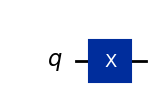

In [3]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(1)
qc.x(0)
qc.draw("mpl")

In this very simple circuit diagram, the qubit is represented by a wire, the black horizontal line, and the gate shows up as a box on that wire.

__Hadamard gate:__ Creates a superposition state. Truth table:

| Input | Output |
| :------- | -------: |
| $\vert 0\rangle$      | $\frac{1}{\sqrt{2}}\left(\vert 0\rangle+\vert 1\rangle\right)$  |
| $\vert 1\rangle$  | $\frac{1}{\sqrt{2}}\left(\vert 0\rangle-\vert 1\rangle\right)$  |


Matrix representation:
$$H=\frac{1}{\sqrt{2}}\begin{pmatrix} 1 & 1 \\ 1 & -1 \end{pmatrix}$$

A circuit with a Hadamard gate is made as follows:

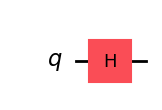

In [4]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(1)
qc.h(0)
qc.draw("mpl")

**$Z$ gate**: Adds a phase shift of $\Delta \phi = \pi$  to the $|1\rangle$ state:

| Input | Output |
| :------- | -------: |
| $\vert 0\rangle$      | $\vert 0\rangle$  |
| $\vert 1\rangle$  | $-\vert 1\rangle$  |

$$Z=\begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix}$$

In Qiskit, creating a circuit with an $Z$ gate looks like this:

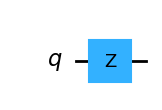

In [5]:
qc = QuantumCircuit(1)
qc.z(0)
qc.draw("mpl")

**$T$ gate**: Adds a phase shift of $\Delta \phi = \pi/4$  to the $|1\rangle$ state:

| Input | Output |
| :------- | -------: |
| $\vert 0\rangle$      | $\vert 0\rangle$  |
| $\vert 1\rangle$  | $e^{i\pi/4}\vert 1\rangle$  |

$$T=\begin{pmatrix} 1 & 0 \\ 0 & e^{i\pi/4} \end{pmatrix}$$

In Qiskit, creating a circuit with an $T$ gate looks like this:

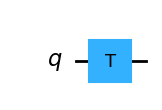

In [6]:
qc = QuantumCircuit(1)
qc.t(0)
qc.draw("mpl")

### Multi-qubit gates

Two-qubit gates can resemble classical two-bit gates, but with one important caveat: all quantum gates must be reversible. In linear algebra terms, this means they are represented by unitary matrices. Thus, two input qubits always map to two output qubits, and the operation can, in principle, be undone. This stands in contrast to the classical gates we saw above such as AND or OR, which lose information and are irreversible — given an output, you cannot uniquely determine the input.

__CNOT (Controlled-NOT) gate:__ The two input qubits are called the "control" and "target" qubits. The control qubit remains unchanged, but its state dictates what happens to the target qubit. If the control qubit is in the state $\vert 1\rangle$, then an $X$ gate is applied to that target; if the state of the control qubit is $\vert 0\rangle$, then no change is made. In the notation below, assume the qubit $A$ (rightmost qubit) is the control, and qubit $B$ (the leftmost qubit) is the target. Below, the notation used is $CNOT(q_{control},q_{target})\vert BA\rangle.$

$$CNOT(A,B)\vert BA\rangle_{input} = \vert BA\rangle_{output}$$

| Input | Output |
| :------- | -------: |
| $\vert 00\rangle$      | $\vert 00\rangle$  |
| $\vert 01\rangle$      | $\vert 11\rangle$  |
| $\vert 10\rangle$      | $\vert 10\rangle$  |
| $\vert 11\rangle$      | $\vert 01\rangle$  |

So, the matrix representing this action is:

$$CNOT=\begin{pmatrix} 1 & 0 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0 \\ 0 & 1 & 0 & 0\end{pmatrix}$$

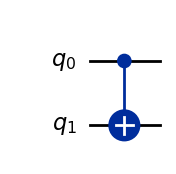

In [7]:
qc = QuantumCircuit(2)
qc.cx(0, 1)
qc.draw("mpl")

This is the first circuit diagram we see with two qubits, which are represented by the two wires. The CNOT gate is implemented between the two qubits, with $q_0$ as control and $q_1$ as target.

#### Check your understanding
Read the question(s) below, think about your answer, then click the triangle to reveal the solution.
<details>
<summary>

Most gates have the same matrix form in Qiskit as everywhere else. But the CNOT gate acts on two qubits, and so suddenly ordering conventions of qubits become an issue. Texts that order qubits $\vert q_0,q_1,...\rangle$ will show a different matrix form for their CNOT gates. Verify by explicit matrix multiplication that the CNOT matrix above has the correct action on the state $\vert 01\rangle.$

</summary>

__Answer:__


$$CNOT\vert 01\rangle =\begin{pmatrix} 1 & 0 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0 \\ 0 & 1 & 0 & 0\end{pmatrix}\begin{pmatrix}0 \\ 1 \\ 0 \\0\end{pmatrix} = \begin{pmatrix}0 \\ 0 \\ 0 \\1\end{pmatrix} = \vert 11\rangle$$


</details>



__SWAP gate:__ This gate swaps the states of two qubits. Truth table:


| Input | Output |
| :------- | -------: |
| $\vert 00\rangle$      | $\vert 00\rangle$  |
| $\vert 01\rangle$      | $\vert 10\rangle$  |
| $\vert 10\rangle$      | $\vert 01\rangle$  |
| $\vert 11\rangle$      | $\vert 11\rangle$  |

So, the matrix representing this action is:

$$SWAP=\begin{pmatrix} 1 & 0 & 0 & 0 \\ 0 & 0 & 1 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1\end{pmatrix}$$

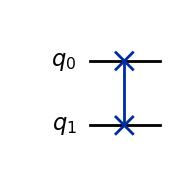

In [8]:
qc = QuantumCircuit(2)
qc.swap(0, 1)
qc.draw("mpl")

The SWAP gate can actually be constructed from three CNOTs. To see how, we can `decompose()` the gate with Qiskit:

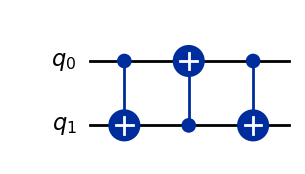

In [9]:
qc = QuantumCircuit(2)
qc.swap(0, 1)
qc.decompose().draw("mpl")

Here we see for the first time how multiple gates are shown in a circuit diagram. We read it from left to right, so the leftmost gate is applied first.


#### Check your understanding
Read the question(s) below, think about your answer, then click the triangle to reveal the solution.
<details>
<summary>

Verify that the combination of CNOTs above results in a SWAP gate. You can do so with matrix multiplication or any other method.

</summary>

__Answer:__


With matrix multiplication:

$$ \begin{pmatrix} 1 & 0 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0 \\ 0 & 1 & 0 & 0\end{pmatrix} \begin{pmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0\end{pmatrix} \begin{pmatrix} 1 & 0 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0 \\ 0 & 1 & 0 & 0\end{pmatrix} = \begin{pmatrix} 1 & 0 & 0 & 0 \\ 0 & 0 & 1 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1\end{pmatrix} = SWAP ~\checkmark $$

Using a truth table to see how the states change with each CNOT. In the last column, the states should be equivalent to the "output" column of the SWAP truth table:

| Input | CNOT(A,B) |  CNOT(B,A) | CNOT(A,B)
| :------- | :-------: |:-------: |-------: |
| $\vert 00\rangle$      | $\vert 00\rangle$  | $\vert 00\rangle$  | $\vert 00\rangle \checkmark$  |
| $\vert 01\rangle$      | $\vert 11\rangle$  | $\vert 10\rangle$  | $\vert 10\rangle \checkmark$  |
| $\vert 10\rangle$      | $\vert 10\rangle$  | $\vert 11\rangle$  | $\vert 01\rangle \checkmark$  |
| $\vert 11\rangle$      | $\vert 01\rangle$  | $\vert 01\rangle$  | $\vert 11\rangle \checkmark$  |


</details>


__Toffoli gate (or "controlled-controlled-NOT" (CCNOT)):__ This is a *three*-qubit gate. The name "controlled-controlled-NOT" may already tell you how it works: there are two control qubits and one target qubit, and the state of the target qubit is flipped only if *both* control qubits are in the state $\vert 1\rangle$. We keep the ordering convention that we used with the CNOT:

$$
CCNOT(Control A, Control B, Target C)\vert CBA\rangle
$$

So the truth table is:

| Input | Output |
| :------- | -------: |
| $\vert 000\rangle$      | $\vert 000\rangle$  |
| $\vert 001\rangle$      | $\vert 001\rangle$  |
| $\vert 010\rangle$      | $\vert 010\rangle$  |
| $\vert 011\rangle$      | $\vert 111\rangle$  |
| $\vert 100\rangle$      | $\vert 100\rangle$  |
| $\vert 101\rangle$      | $\vert 101\rangle$  |
| $\vert 110\rangle$      | $\vert 110\rangle$  |
| $\vert 111\rangle$      | $\vert 011\rangle$  |

And the matrix representing this action is:

$$
CCNOT=\begin{pmatrix} 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\0 & 1 & 0 & 0 & 0 & 0 & 0 & 0\\ 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 \\ 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0\end{pmatrix}
$$

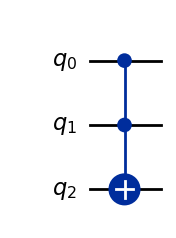

In [10]:
qc = QuantumCircuit(3)
qc.ccx(0, 1, 2)
qc.draw("mpl")

The Toffoli gate, too, can be decomposed into CNOTs, along with some other gates. However, it is significantly more complicated than the SWAP gate decomposition, so it will be left as an optional exercise at the end of the module to explore and verify this decomposition.

## Measurements

Measurements play a special role in quantum computing — one that has no classical computing analog. While in classical computing, you can check your bits at any point of your choosing during an algorithm, in quantum computing, you must be very selective about when to look at your qubits because measurement collapses their state and destroys the superposition that gives qubits their computational complexity.

In particular, given an $N$-bit quantum state $\vert \psi\rangle = \sum_{i=0}^{2^N-1} c_i \vert i\rangle$, a measurement will collapse the state to one of the basis functions $\vert i\rangle$ with a probability equal to $\vert c_i\vert ^2$.

But this destructive effect of a measurement isn't always a hindrance. It is in fact a key resource in certain algorithms and protocols, such as [quantum teleportation](/learning/modules/computer-science/quantum-teleportation) and [quantum key distribution](/learning/modules/computer-science/quantum-key-distribution).

In Qiskit, when a measurement is made, it is sent to a classical register where it is stored as a classical bit. Creating a circuit with a measurement looks like this:

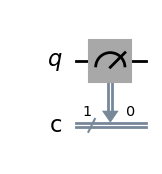

In [11]:
qc = QuantumCircuit(
    1, 1
)  # the second number is the number of classical bits in the circuit
qc.measure(0, 0)
qc.draw("mpl")

## Circuits

Now that we know how qubits, gates, and measurements work, let's make and execute our own quantum circuit! For this, we'll need to introduce you to a useful workflow called Qiskit patterns.

### Qiskit patterns framework

The Qiskit patterns framework is a general procedure for approaching and solving problems with a quantum computer. It consists of four steps:

1. **Mapping** our problem to quantum circuits and operators
2. **Optimizing** the circuit for target hardware
3. **Executing** on target hardware
4. **Post-processing** our results

To illustrate these steps, we will implement a *quantum* version of the half-adder circuit discussed above.

#### 1. Mapping

The classical adder circuit uses an XOR and an AND gate to calculate the sum and carry bits, respectively. We can adapt these gates to the quantum context to make the quantum half adder. First, remembering that quantum gates are *reversible*, we cannot simply overwrite the inputs. Instead, we introduce two helper qubits initialized to $\vert 0\rangle$ to store the sum and carry outputs. So, our full quantum state will consist of qubits $A$ and $B$, and the sum and carry qubits, which we'll label $S$ and $C$:

$\vert \psi\rangle = \vert C S B A\rangle$

Now, we need quantum gates that accomplish what the XOR and AND gates did in the classical circuit.

**Sum:**

For the XOR, we apply two CNOTs, each with control qubits $A$ and $B$ and target qubit $S$ for both. If $A$ and $B$ are different, then one of the CNOT gates will flip $S$ to the $\vert 1\rangle$ state. If $A$ and $B$ are both $\vert 0\rangle$, then nothing happens to $S$ and it remains in the $\vert 0\rangle$ state. If $A$ and $B$ are both $\vert 1\rangle$, then the state of $S$ will flip twice, bringing it back to the $\vert 0\rangle$ state.



**Carry:**

For the carry bit, we need something that works like the classical AND gate.


#### Check your understanding
Read the question(s) below, think about your answer, then click the triangle to reveal the solution.
<details>
<summary>

Look back through the gates we've discussed to see if you can guess which quantum gate we'll use in place of the classical AND gate:

</summary>

__Answer:__

It's the Toffoli gate! Remember, the Toffoli, or controlled-controlled-NOT gate, flips the target state if and only if control qubit 0 AND control qubit 1 are both $\vert 1\rangle$. So, if the target qubit starts in the state $\vert 0\rangle$, then it has the same action as the AND gate.

</details>


So, now we have all the ingredients we need to make the quantum circuit:

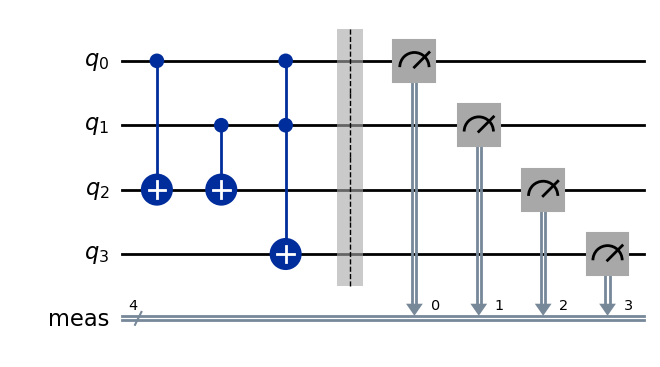

In [12]:
# qubits: a, b, sum, carry
qc = QuantumCircuit(4)

# Choose values for A and B:
a = 0
b = 0

# Prepare A and B qubits according to selected values:
if a:
    qc.x(0)
if b:
    qc.x(1)

# XOR (sum) into qubit 2
qc.cx(0, 2)
qc.cx(1, 2)

# AND (carry) into qubit 3
qc.ccx(0, 1, 3)  # a AND b

# measure
qc.measure_all()


qc.draw("mpl")

Above is the circuit diagram for the quantum half-adder circuit. As mentioned previously, the wires represent qubits $0$ to $3$ ordered from top to bottom, and the classical bit register is the bottom double-lined wire. Then, reading from left to right, we see how the gates are applied to each qubit by seeing where the boxes show up on the corresponding wires. Finally, the measurements are shown at the end. The measurements collapse the qubit states into definite $0$ or $1$ values, and the results are sent to a classical register.

One subtlety: although the circuit diagram is drawn left to right, when writing the corresponding matrix expression we must read it right to left. This is because in matrix multiplication, the operator closest to the state vector acts first. So, for example, the above circuit (ignoring the measurements) would be written as: 

$$
CCNOT(q0, q1, q3) CNOT(q1, q2) CNOT(q0, q2) |q3 q2 q1 q0>\rangle
$$



#### 2. Optimizing:

Next, we need to optimize the circuit to be run on the quantum hardware. This optimization is accomplished through the transpiler, which translates the abstract circuit shown above into instructions that the quantum computer will understand. It assigns the logical qubits above to real, physical qubits on the processor and rewrites the gates in terms of its own native set of gates that have been optimized to run on the quantum computer. Finally, the transpiler also implements something called "error suppression and mitigation" to try to minimize the effect of errors on the result. This isn't so important for our very simple circuit, but if you continue in your quantum computing journey to run more complicated circuits, you will soon see the value of error suppression and mitigation. If you want to learn more about this, see Olivia Lane's course, [Quantum Computing in Practice](/learning/courses/quantum-computing-in-practice/introduction).

First, we load the packages that are required to communicate with IBM&reg; quantum computers and select a backend to run on. We can either choose the least-busy backend, or select a specific backend whose properties we know.

There is code below for saving your credentials upon first use. Be sure to delete this information from the notebook after saving it to your environment, so that your credentials are not accidentally shared when you share the notebook. See [Set up your IBM Cloud account](/docs/guides/cloud-setup) and [Initialize the service in an untrusted environment](/docs/guides/cloud-setup-untrusted) for more guidance.

In [11]:
# Load the Qiskit Runtime service
from qiskit_ibm_runtime import QiskitRuntimeService

# Load the Qiskit Runtime service

# Syntax for first saving your token.  Delete these lines after saving your credentials.
# QiskitRuntimeService.save_account(channel='ibm_quantum_platform', instance = '<YOUR_IBM_INSTANCE_CRN>', token='<YOUR-API_KEY>', overwrite=True, set_as_default=True)
# service = QiskitRuntimeService(channel='ibm_quantum_platform')

# Load saved credentials
service = QiskitRuntimeService()

# Use the least busy backend, or uncomment the loading of a specific backend like "ibm_brisbane".
backend = service.least_busy(operational=True, simulator=False, min_num_qubits=127)
# backend = service.backend("ibm_brisbane")
print(backend.name)

ibm_fez


Now, we use the transpiler to optimize the circuit. We can choose the optimization level from 0 (no optimization) to 3 (highest optimization). To see what each level entails, visit the [Set transpiler optimization level](/docs/guides/set-optimization) guide. The resulting circuit will look significantly different from the logical circuit we made in our mapping step.

In [13]:
# Transpile the circuit and optimize for running on the quantum computer selected
# Step 2: Transpile
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

target = backend.target
pm = generate_preset_pass_manager(target=target, optimization_level=3)
qc_isa = pm.run(qc)

qc_isa.draw("mpl")

<Image src="/learning/images/modules/quantum-mechanics/get-started-with-qiskit/extracted-outputs/ad106853-7416-4fb9-b8e3-c43bb81c9059-0.avif" alt="Output of the previous code cell" />

A "Sampler" is a primitive designed to sample possible states resulting from a quantum circuit, and collect statistics on what states might be measured and with what probability. We import the Qiskit Runtime Sampler here:

In [14]:
# Load the Runtime primitive and session
from qiskit_ibm_runtime import SamplerV2 as Sampler

sampler = Sampler(mode=backend)

If you have exhausted your allotted time on real quantum computers or if you are without an internet connection, you may prefer to use a simulator. To do this, run the cell below and uncomment the associated line in the "Execute" step.

In [15]:
# Load the backend sampler
from qiskit.primitives import BackendSamplerV2

# Load the Aer simulator and generate a noise model based on the currently-selected backend.
from qiskit_aer import AerSimulator
from qiskit_aer.noise import NoiseModel

noise_model = NoiseModel.from_backend(backend)

# Define a simulator using Aer, and use it in Sampler.
backend_sim = AerSimulator(noise_model=noise_model)
sampler_sim = BackendSamplerV2(backend=backend_sim)

# Alternatively, load a fake backend with generic properties and define a simulator.
# backend_gen = GenericBackendV2(num_qubits=18)
# sampler_gen = BackendSamplerV2(backend=backend_gen)

#### 3. Executing

After preparing the circuit, we can now run it on the quantum computer!

In [16]:
job = sampler.run([qc_isa], shots=100)
# job = sampler_sim.run([qc_isa]) # uncomment if you want to run on a simulator
res = job.result()
counts = res[0].data.meas.get_counts()

#### 4. Post-processing

Now we're ready to view our results! We'll display a histogram of the 100 samples of the circuit.

In [17]:
from qiskit.visualization import plot_histogram

print("counts = ", counts)
plot_histogram(counts)

counts =  {'0000': 90, '0100': 4, '1100': 3, '0010': 3}


<Image src="/learning/images/modules/quantum-mechanics/get-started-with-qiskit/extracted-outputs/a4efc93d-ed2e-406f-b335-deeaa661c55b-1.avif" alt="Output of the previous code cell" />

The above histogram shows the measurement results of all four qubits at the end of the circuit. An ideal quantum computer with zero noise would have measured the qubits to have the same values every time, but in reality, noise will cause some of the runs to produce errors.

#### Check your understanding
Read the question(s) below, think about your answer, then click the triangle to reveal the solution.
<details>
<summary>

Using the bitstring with the most counts as your values for $A$, $B$, $S$, and $C$, verify that the quantum adder circuit worked.

</summary>

__Answer:__

We need to verify that $A+B = S+2 \times C$. Remember that the bitstring order follows little-endian notation, so it is read `CSBA`.

From the histogram above, we see that the `0000` bitstring is the dominant one.

$$0 + 0 = 0 + 0 \times 2 = 0 ~\checkmark$$

</details>

<details>
<summary>

Go back and change the values of $A$ and $B$ to $A=1$ and $B=1$ and go through the Qiskit patterns steps again to rerun the circuit. Verify that the adder circuit worked again.

</summary>

__Answer:__

You should obtain a histogram with the dominant bitstring being `1011`:

$$1 + 1 = 0 + 1 \times 2 = 2 ~\checkmark$$


</details>

One of the added features of the *quantum* half-adder over the classical half-adder is that it can run with *quantum* inputs. That is, it can "add" qubits $A$ and $B$ even if they are in superposition states. In the Challenge Questions section below, you will be asked to prepare the qubits in superpositions and see what happens!

## Conclusion

This module was designed to give you a firm foundational understanding of the basic principles behind quantum computing by comparing it to classical computing. We looked at the classical half-adder circuit and then showed you how to adapt the circuit to run with qubits on a quantum computer. Now you're ready to explore the other Qiskit in the Classroom modules!

### Critical concepts:

- In contrast to classical bits which can only take on values 0 and 1, qubits can also be in **superposition** states of both 0 and 1.
- Multiple qubits can be in a superposition over the classically allowed bitstrings called **computational basis states**.
- Multiple qubits can be **entangled** so that the state of one depends on the state of the other.
- The Qiskit convention is to use **little-endian notation**, which places the least significant qubit, $q_0$, in the rightmost position and the most significant qubit, $q_N$, leftmost.
- **Quantum gates** are reversible operations that are represented by unitary matrices which act on the quantum state vectors. In this notation, the matrix closest to the vector (which is furthest right) acts first.
- **Measurements** collapse a quantum superposition state into one of its classically allowed states, with probability equal to the square of the amplitude of the corresponding computational basis state in the superposition.
- Quantum circuits are often represented using **quantum circuit diagrams**, where qubits are depicted as horizontal wires, and quantum gates appear along these wires from left to right.
- To run a quantum circuit, we use the four steps in the **Qiskit patterns** workflow: **Map**, **Optimize**, **Execute**, **Post-process**.

## Questions

### True/False Questions

1. A single bit in a classical computer can only hold the value 0 or 1.

2. Entanglement means the state of one qubit is independent of the state of another.

3. Quantum gates are generally irreversible operations.

4. The Qiskit convention places the least significant qubit, $q_0$, at the leftmost position.

5. Measuring a quantum state always gives the exact same result if repeated many times.

6. The Hadamard gate creates superposition in a single qubit.

7. Quantum circuits may include measurement operations that collapse the superposition state into one of the classically allowed states.

8. The number of possible classical states for $N$ bits is $2N$.

9. The outcome probabilities for quantum measurements are given by the squared amplitudes of the classically measurable basis states.


### Short Answer Questions

1. What are some primary differences between a bit and a qubit?

2. What happens to a quantum state when it is measured?

3. Why do we use little-endian notation in Qiskit?

4. What are the four steps in the Qiskit patterns workflow?


### Challenge Questions:

1. In the module, we only used the adder to add classically allowed states for $A$ and $B$. But we can also prepare $A$ and $B$ in superpositions! Change the code to prepare each qubit in an equal superposition of 0 and 1, then run the new circuit and obtain a new histogram. What do you see? Explain what is happening.


2. Toffoli gate decomposition. Use `decompose()` to show how the Toffoli gate is decomposed into single- and two-qubit gates, then verify this construction with matrix multiplication. Keep in mind that although circuit diagrams are read left to right, matrices are applied to quantum states right to left!